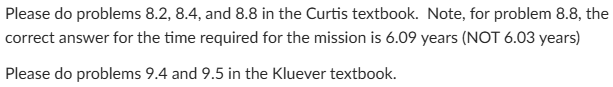
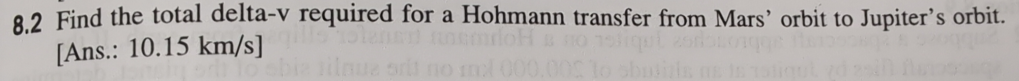

In [4]:
from sympy import *

# symbols

r_J   = Symbol( 'r_J' ) # Jupiter circular orbit radius, km
r_M   = Symbol( 'r_M' ) # Mars circular orbit radius, km
mu_Sun = Symbol( 'mu_Sun'   ) # Sun geocentric gravitational constant

# values

values = [
            ( r_M   , 2.279 * 10**8 ) ,
            ( r_J   , 7.786 * 10**8),
            ( mu_Sun , 1.327 * 10**11 ) ,
]

a_t = (r_M + r_J)/2

# transfer orbit periapsis and apoapsis velocities
v_pe_1 = sqrt(mu_Sun*(2/r_M - 1/a_t))
v_ap_1 = sqrt(mu_Sun*(2/r_J - 1/a_t))

# Mars (initial) and Jupiter (target) circular velocities
v_initial = sqrt( mu_Sun / r_M)
v_target = sqrt( mu_Sun / r_J)

# Hohmenn Transfer:

Δv_i = v_pe_1 - v_initial
Δv_f = v_target - v_ap_1

Δv_total = Δv_f + Δv_i

print("Delta V required: ",Δv_total.subs(values).evalf(),"km/s")

Delta V required:  10.1536971856748 km/s


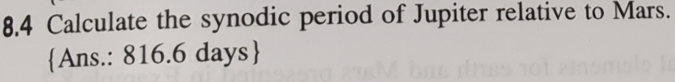

In [11]:
%reset -f
from sympy import *

# symbols
r_J   = Symbol( 'r_J' ) # Jupiter circular orbit radius, km
r_M   = Symbol( 'r_M' ) # Mars circular orbit radius, km
mu_Sun = Symbol( 'mu_Sun'   ) # Sun geocentric gravitational constant

# values
values = [
            ( r_M   , 2.279 * 10**8 ) ,
            ( r_J   , 7.786 * 10**8),
            ( mu_Sun , 1.327 * 10**11 ) ,
]

def Orbit_Period(mu,a):
    return 2*pi / sqrt(mu) * (a)**(1.5)

T_M =Orbit_Period(mu_Sun,r_M)
T_J =Orbit_Period(mu_Sun,r_J)

# Synodic time period

T_syn = T_J * T_M / (T_J - T_M)

print("synotic time period:",(T_syn/(3600*24)).subs(values).evalf(),'days')


synotic time period: 816.057331398981 days


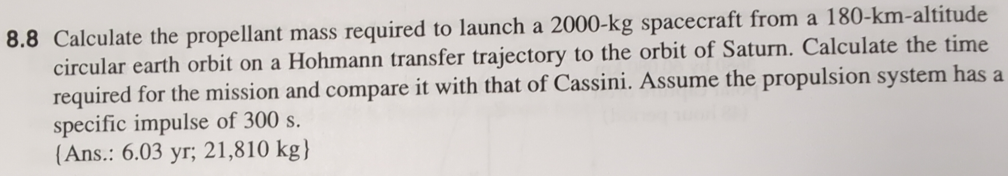

In [ ]:
%reset -f
from sympy import *

# symbols
r_S   = Symbol( 'r_S' ) # Saturn circular orbit radius, km
r_E   = Symbol( 'r_E' ) # Earth circular orbit radius, km
mu_Earth = Symbol('mu_Earth')
mu_Sun = Symbol( 'mu_Sun'   ) # Sun geocentric gravitational constant
m_dry = Symbol( 'm_dry'   ) # dry mass of spacecraft
Isp = Symbol( 'Isp'   ) # spacecraft ISP
g_0 = Symbol( 'g_0'   ) # spacecraft ISP
r_spacecraft = Symbol( 'r_spacecraft'   ) # radius of spacecraft

# values
values = [
    ( r_E   , 1.496 * 10**8 ) ,
    ( r_S   , 1.433 * 10**9),
    (mu_Earth, 3.986 * 10**5),
    ( mu_Sun , 1.327 * 10**11 ) ,
    ( m_dry , 2000) ,
    ( r_spacecraft , 180 + 6378 ) ,
    ( Isp , 300 ) , # s
    ( g_0 , 9.81/1000 ) , # km/s^2
]

# let us start with the interplanetary transfer to saturn:
a_t = (r_E + r_S)/2

# transfer orbit periapsis and apoapsis velocities
v_pe_1 = sqrt(mu_Sun*(2/r_E - 1/a_t))
v_ap_1 = sqrt(mu_Sun*(2/r_S - 1/a_t))

# Mars (initial) and Jupiter (target) circular velocities
v_initial = sqrt( mu_Sun / r_E)
v_target = sqrt( mu_Sun / r_S)

# Hohmann Transfer:
v_insertion = v_pe_1 - v_initial
Δv_final = v_target - v_ap_1


# time elapsed for earth escape & saturn transfer:
# (the earth escape is negligible time-wise)

ΔT_t1 = (pi*a_t**(1.5))/(mu_Sun**(0.5))
# ΔT_t2 = (pi*a_i**(1.5))/(mu_Earth**(0.5))

ΔT_total = ΔT_t1 #+ ΔT_t2
print("Saturn Transfer time:",(ΔT_total/(3600*24*365)).subs(values).evalf(),"years")

# now to calculate the escape burn required from the earth parking orbit

a_i = -mu_Earth / v_insertion**2

v_p_i = sqrt(2 * mu_Earth / r_spacecraft - mu_Earth / a_i)
v_park = sqrt(mu_Earth / r_spacecraft)

Δv_Earth_Escape = v_p_i - v_park

Δv_total = Δv_final + Δv_Earth_Escape
print("Delta V required to escape Earth on Hohmann transfer to Saturn:",(Δv_Earth_Escape).subs(values).evalf(),'km/s')

# print("Saturn Hohmann required:",(Δv_final+v_insertion).subs(values).evalf(),'km/s')
# print("Total Delta V required:",Δv_total.subs(values).evalf(),'km/s')

# rearranging Δv = -v_exhaust*ln(mv/(mv + mp)) gives:
m_p = m_dry*(exp(Δv_Earth_Escape/(Isp*g_0))-1)

print("Propellant mass required:",m_p.subs(values).evalf(),'kg')

Saturn Transfer time: 6.08722777791360 years
Delta V required to escape Earth on Hohmann transfer to Saturn: 7.28946965612044 km/s
Propellant mass required: 21808.2270556198 kg


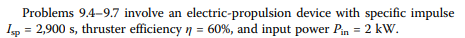
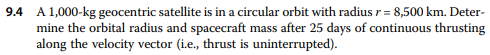
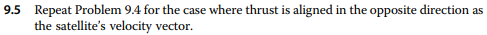

In [58]:
%reset -f
from sympy import *

# symbols
mu = Symbol('mu')
m_total = Symbol( 'm_total'   ) # mass of spacecraft
Isp = Symbol( 'Isp'   ) # spacecraft ISP
g_0 = Symbol( 'g_0'   ) # spacecraft ISP
r_spacecraft = Symbol( 'r_spacecraft'   ) # radius of spacecraft
power_in = Symbol( 'power_in'   ) # power supplied to thruster
thrust_time = Symbol( 'thrust_time'   ) # efficiency of thruster
η = Symbol( 'η'   ) # efficiency of thruster

# values
values = [
    (mu, 3.986 * 10**5),
    ( m_total , 1000) , # kg
    ( r_spacecraft , 8500 ) , # km
    ( power_in , 2000 ) , # kilowatts
    ( Isp , 2900 ) , # s
    ( g_0 , 9.81 ) , # m/s^2
    ( thrust_time , 25*24*3600) , # s
    ( η , 0.6) , 
]

#First we need to compute the thrust of the spacecraft
power_eff = power_in * η

# Eq 9.1
c = Isp * g_0 # in units of m/s

# Eq. 9.6 from Kleuver
thrust = 2 * power_eff / c

m_delta = thrust / c

# Time constant tau
τ = m_total/m_delta

#initial velocity
v_init = sqrt(mu/r_spacecraft)

mass_final = m_total - m_delta*thrust_time

print("final mass after",(thrust_time/24/3600).subs(values).evalf(),'days of thrusting:',mass_final.subs(values).evalf())

# now to use Curtis Eq. 6.38 to find the final circular orbit velocity, Kluever 9.26
final_radius_with = mu / ( v_init  -  (c/1000) * log(τ / (τ - thrust_time) ) )**2

print("final orbital radius, thrusting aligned with velocity:",final_radius_with.subs(values).evalf(),'km')

final_radius_against = mu / ( v_init  +  (c/1000) * log(τ / (τ - thrust_time) ) )**2

print("final orbital radius, thrusting against velocity:",final_radius_against.subs(values).evalf(),'km')

# now to use this to find the final radius

final mass after 25.0000000000000 days of thrusting: 993.594825259327
final orbital radius, thrusting aligned with velocity: 8972.65991464759 km
final orbital radius, thrusting against velocity: 8063.72765063944 km
